In [2]:
import pandas as pd
from sklearn import metrics #Validar metodos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#Hace que los plots se ajusten a la imagen correctamente

UsageError: unrecognized arguments: #Hace que los plots se ajusten a la imagen correctamente


In [4]:
diabetes = pd.read_csv('2diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape   #son 768 pacientes

(768, 9)

In [6]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
logreg = LogisticRegression(max_iter = 1000) #Prepara los comandos de entrenamiento
    # El error LBFGS es por el limite por defecto de iteraciones (100) que no permite su correcto funcionamiento
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

In [9]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred) #funcion para validar el modelo
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de Prediccion')

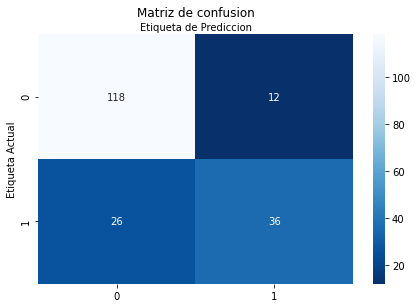

In [11]:
import numpy as np
class_names = [0,1]   # Funcion para mostrar 2 valores, tiene o no diabetes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta Actual')
plt.xlabel('Etiqueta de Prediccion')

# 118 Casos correctas: CON DIABETES
# 12 Casos incorrectos: Tiene diabete y recibio la etiqueta de "Sin diabetes"
# 26 Casos incorrectos: No tiene diabetes y recibio la etiqueta de "Con diabetes"
# 36 Casos correctos: SIN DIABETES

# Observacion vs Prediccion

In [12]:
print("Exactitud ", metrics.accuracy_score(Y_test, y_pred))

# [T]rue and [F]alse
# [P]ositive and [N]egative
# Exactitud = TP + TN / ALL          Error = FP + FN / ALL

Exactitud  0.8020833333333334
